In [1]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
# Google Drive path where coursework material is available
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Dissertation'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['accepted_2013_to_2018_filtered.csv', 'FINAL_unbalancedData.csv', 'Final_balanced_data.csv', 'Cleaned_data.csv', 'accepted_2013_to_2018_latest1.csv', 'accepted_2013_to_2018_latest.csv', 'accepted_2007_to_2018q4.csv.zip', 'XGBoost_model.ipynb', 'Cleaned_data_dummy.csv', 'NN_Keras.ipynb', '3_Filter Individual_loans_EDA_ and_cleaning.ipynb', 'y_data.csv', 'x_data.csv', 'Copy of Individual_loans_hypothesisTesting.ipynb', 'FINAL_balancedData.csv', 'FINAL_forModeling.csv', 'ANN_model.joblib', 'Decsion_tree_model.joblib', 'Model_5_ANN.ipynb', 'Random_fores.joblib', '4_Individual_loans_hypothesisTesting_and_undersampling.ipynb', 'FINAL_balancedData_testing.csv', 'XGBoost_model.joblib', 'XAI_RandomForest.ipynb', '2_Filter_data_on_Loan_status.ipynb', 'Random_forest_model.ipynb', 'Copy of 3_Filter Individual_loans_EDA_ and_cleaning.ipynb', 'Untitled0.ipynb', 'Model_4_XGBoost.ipynb', '1_Filter_data_2013_to_2018.ipynb', 'Logistic_Regression.joblib', 'Model_1_Logistic_regression.ipynb', 'Model_2_De

In [10]:
#Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as  plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,precision_score, recall_score,
from sklearn.metrics import RocCurveDisplay
import joblib


In [4]:
#Load dependent and independent variables
X = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'x_data.csv'))
y = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'y_data.csv'))

In [ ]:
X.columns


Index(['int_rate', 'sub_grade', 'term_years', 'inq_last_6mths', 'grade',
       'mths_since_last_delinq', 'num_tl_op_past_12m', 'Not Verified',
       'acc_open_past_24mths', 'MORTGAGE', 'fico_score', 'num_rev_tl_bal_gt_0',
       'emp_length_years', 'Source Verified', 'mths_since_last_record',
       'num_actv_rev_tl', 'pub_rec', 'Verified', 'mths_since_recent_inq',
       'mort_acc'],
      dtype='object')

In [5]:
#Split the data into train and test in 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y, random_state = 129)


In [ ]:
#Train Random forest model with default hyperparameter
rf_default = RandomForestClassifier()
rf_default.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
#Make predictions
pred_default = rf_default.predict(x_test)

In [ ]:
print("Classification Report:")  # print classification report with model trained no hyperparameter tunning
print(classification_report(y_test, pred_default))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85    146697
           1       0.80      0.46      0.58     74335

    accuracy                           0.78    221032
   macro avg       0.79      0.70      0.72    221032
weighted avg       0.78      0.78      0.76    221032



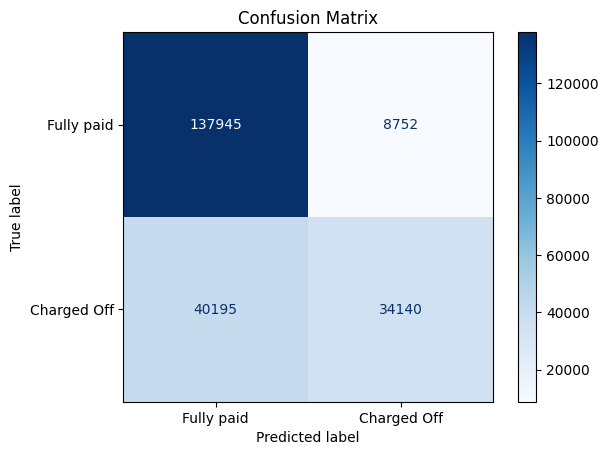

In [ ]:
#Confusion matrix with default parameters
cm_rf1= confusion_matrix(y_test, pred_default)
disp_cm1 = ConfusionMatrixDisplay(confusion_matrix=cm_rf1, display_labels=['Fully paid', 'Charged Off'])
disp_cm1.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#---------------------Model training with balancing weights with default and hyperparamter tunning---------------------------------

In [6]:
loan_distribution = y_train.value_counts(normalize=True)
# default weught wrt to fully paid loan weight
default_weight = loan_distribution[0] / loan_distribution[1]
print(f"default_weight: {default_weight}") #print default weight


default_weight: 1.9734412677700015


In [ ]:
# Train with assigned weights to manage class imbalance
rf_2 = RandomForestClassifier(

    class_weight={0: 1, 1: default_weight},  # Assuming 1 minority class i.e., Default class

)


In [ ]:
rf_2.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight={0: 1, 1: 1.9734412677700015})

In [ ]:
pred_default_classWeights = rf_2.predict(x_test)

In [ ]:
print("Classification Report:")  #With Default parameters, no hyper parameter tunning with balancing with weight class method
print(classification_report(y_test, pred_default_classWeights))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85    146697
           1       0.80      0.46      0.58     74335

    accuracy                           0.78    221032
   macro avg       0.79      0.70      0.72    221032
weighted avg       0.78      0.78      0.76    221032



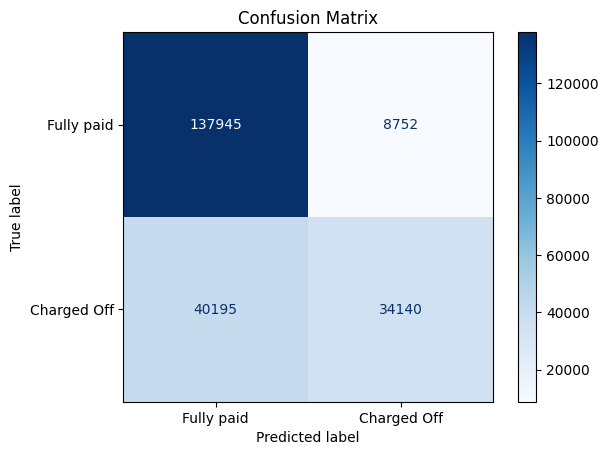

In [ ]:
cm2= confusion_matrix(y_test, pred_default_classWeights)
disp_cm2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Fully paid', 'Charged Off'])
disp_cm2.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#---------------------------hyperparameter tunning on number of trees and maximum depth------------------------------------------------------

In [ ]:
rf_3= RandomForestClassifier( max_depth= 12, n_estimators= 100, random_state = 29, class_weight={0: 1, 1: default_weight}) #hyperparameter tunning done on number of trees
# Train the model on training data
rf_3.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight={0: 1, 1: 1.9734412677700015}, max_depth=12,
                       random_state=29)

In [ ]:
pred = rf_3.predict(x_test) #Make predictions

In [ ]:
print("Classification Report:") #print classification report
print(classification_report(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.77    146697
           1       0.56      0.70      0.62     74335

    accuracy                           0.72    221032
   macro avg       0.69      0.71      0.70    221032
weighted avg       0.74      0.72      0.72    221032



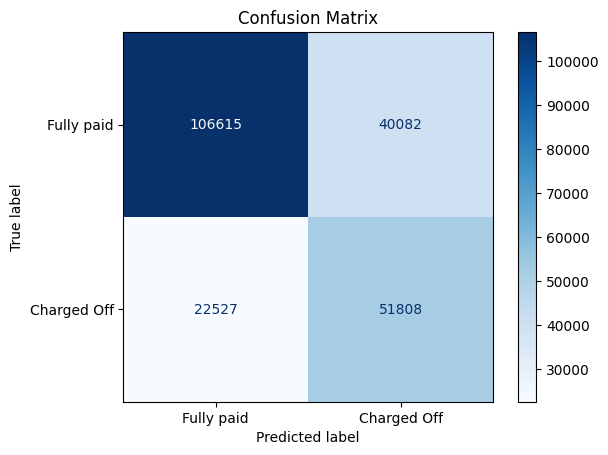

In [ ]:
cm_3 = confusion_matrix(y_test, pred)
disp_cm3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=['Fully paid', 'Charged Off'])
disp_cm3.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
rf_4 = RandomForestClassifier( max_depth= 12, n_estimators= 200, random_state = 29, class_weight={0: 1, 1: default_weight}) #hyperparameter tunning done on number of trees
# Train the model on training data
rf_4.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight={0: 1, 1: 1.9734412677700015}, max_depth=12,
                       n_estimators=200, random_state=29)

In [ ]:
pred = rf_4.predict(x_test) #make predictions

In [ ]:
print("Classification Report:") #print classification report
print(classification_report(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.77    146697
           1       0.56      0.70      0.62     74335

    accuracy                           0.72    221032
   macro avg       0.69      0.71      0.70    221032
weighted avg       0.74      0.72      0.72    221032



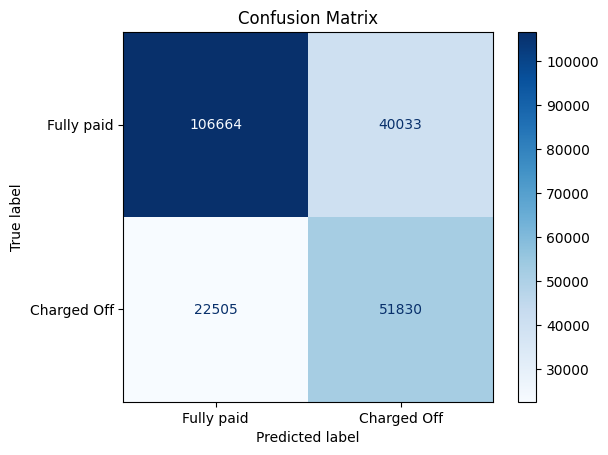

In [ ]:
cm_4 = confusion_matrix(y_test, pred)
disp_cm4 = ConfusionMatrixDisplay(confusion_matrix=cm_4, display_labels=['Fully paid', 'Charged Off'])
disp_cm4.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#-------------------------------------------------Best model-------------------------------------------------------------
rf_5 = RandomForestClassifier( max_depth= 12, n_estimators= 250, random_state = 29, class_weight={0: 1, 1: default_weight}, oob_score=True) #hyperparameter tunning done on number of trees

rf_5.fit(x_train, y_train) #train the model
pred = rf_5.predict(x_test)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.77    146697
           1       0.56      0.70      0.62     74335

    accuracy                           0.72    221032
   macro avg       0.70      0.71      0.70    221032
weighted avg       0.74      0.72      0.72    221032



NameError: name 'ConfusionMatrixDisplay' is not defined

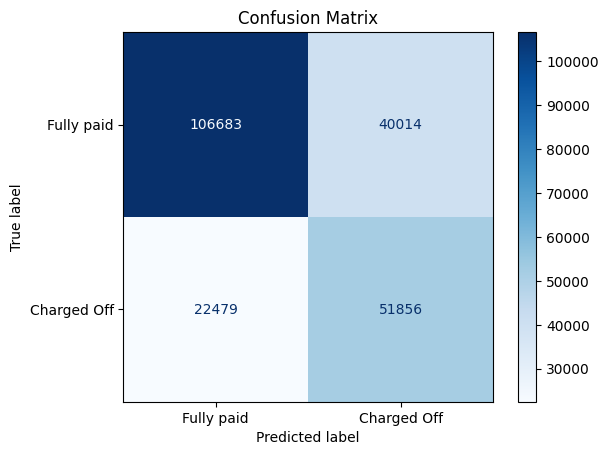

In [ ]:
#plot confusion matrix
cm_5 = confusion_matrix(y_test, pred)
disp_cm5 = ConfusionMatrixDisplay(confusion_matrix=cm_5, display_labels=['Fully paid', 'Charged Off'])
disp_cm5.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# predictions to calculate performance metrices
y_train_pred_rf = rf_5.predict(x_train)
y_test_pred_rf= rf_5.predict(x_test)
y_test_pred_proba_rf = rf_5.predict_proba(x_test)[:, 1]

# performance metrices
train_accuracy = accuracy_score(y_train, y_train_pred_rf)
test_accuracy = accuracy_score(y_test, y_test_pred_rf)
precision = precision_score(y_test, y_test_pred_rf)
recall = recall_score(y_test, y_test_pred_rf)
f1 = f1_score(y_test, y_test_pred_rf)
auc = roc_auc_score(y_test, y_test_pred_proba_rf)

# Print performance results
print(f"Train Accuracy of Random forest: {train_accuracy*100}")
print(f"Test Accuracy of Random forest: {test_accuracy*100}")
print(f"Precision of Random forest: {precision*100}")
print(f"Recall of Random forest: {recall *100}")
print(f"F1 Score Random forest: {f1*100}")
print(f"AUC Random forest: {auc *100}")

Train Accuracy of Random forest: 72.29127974971892
Test Accuracy of Random forest: 71.7267183032321
Precision of Random forest: 56.44497659736585
Recall of Random forest: 69.75987085491356
F1 Score Random forest: 62.40004813332932
AUC Random forest: 79.31282526532787


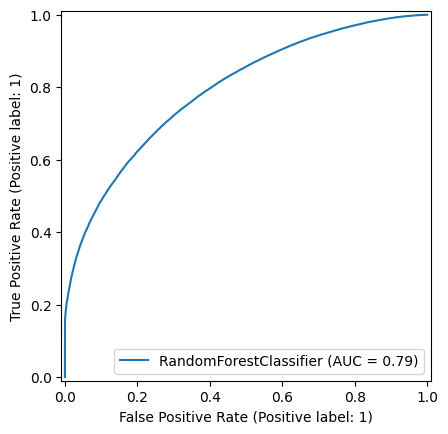

In [ ]:
#print ROC curve
RocCurveDisplay.from_estimator(rf_5, x_test, y_test)

In [ ]:
#--------------------------------------------Save and test the best model----------------------------------------------------------

In [8]:
#Save the model
joblib.dump(rf_5, 'drive/My Drive/Dissertation/Random_fores.joblib')

In [11]:
loaded_model_rf = joblib.load('drive/My Drive/My_Individual_Project/Random_fores.joblib')

In [ ]:
y_testing = loaded_model_rf.predict(x_test)

In [ ]:
accuracy_score(y_test, y_testing)

0.7172671830323211

In [ ]:
feature_importance =rf_5.feature_importances_ #Compare feature importance for comparing interepretebility

In [ ]:
feature_importance = pd.Series(feature_importance, index = X.columns).sort_values(ascending=False)

Text(0, 0.5, 'Feature Importance')

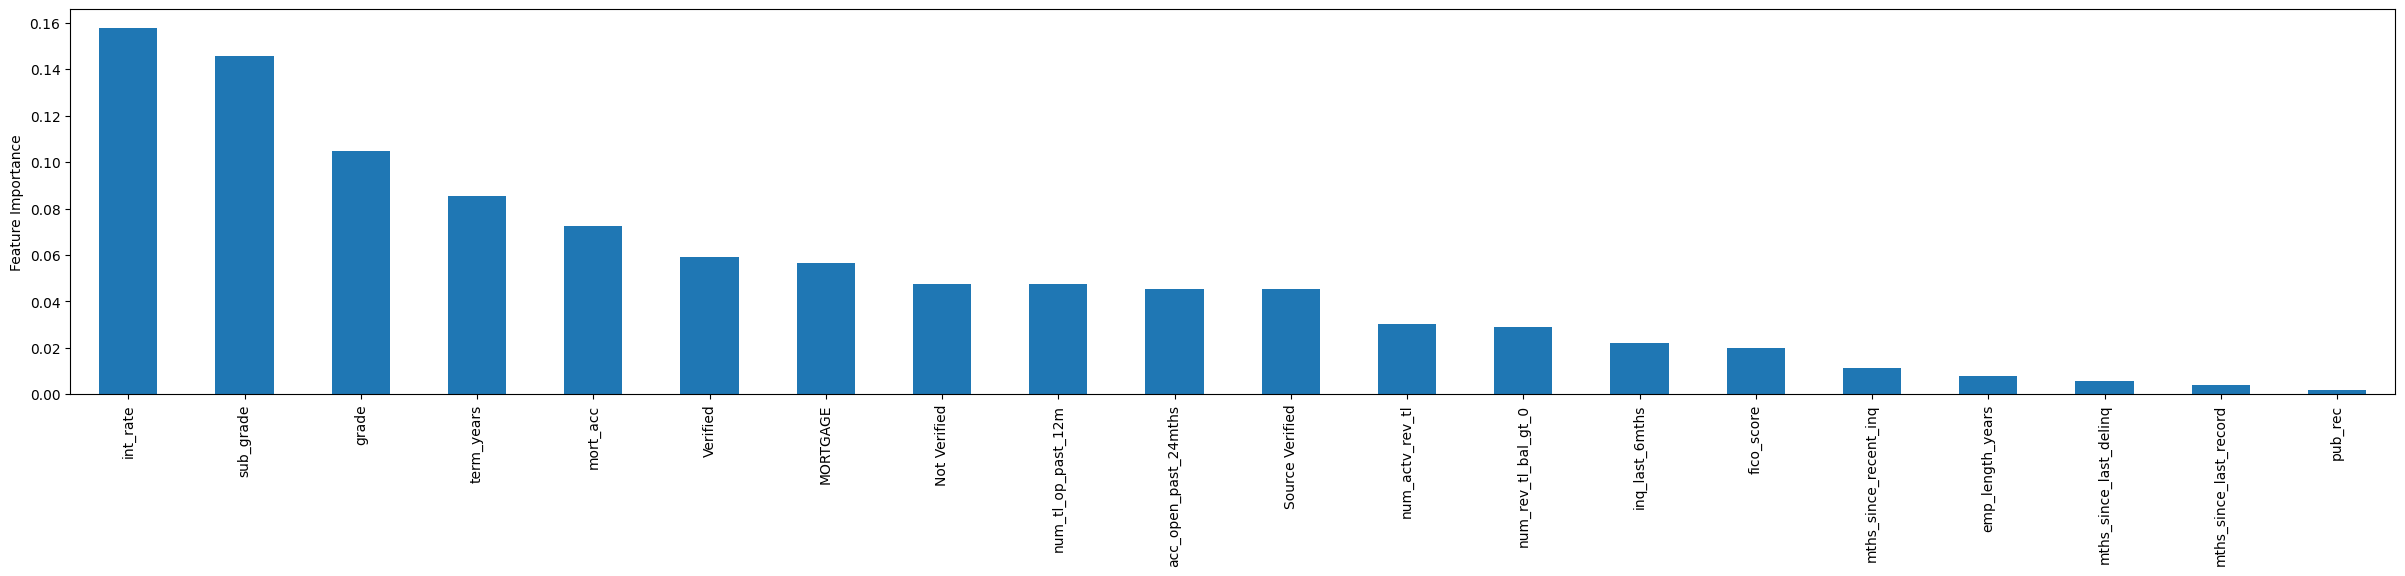

In [ ]:
feature_importance.plot(kind = 'bar', figsize=(30,5))
plt.ylabel("Feature Importance")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79    146697
           1       0.59      0.67      0.63     74335

    accuracy                           0.73    221032
   macro avg       0.70      0.72      0.71    221032
weighted avg       0.74      0.73      0.73    221032



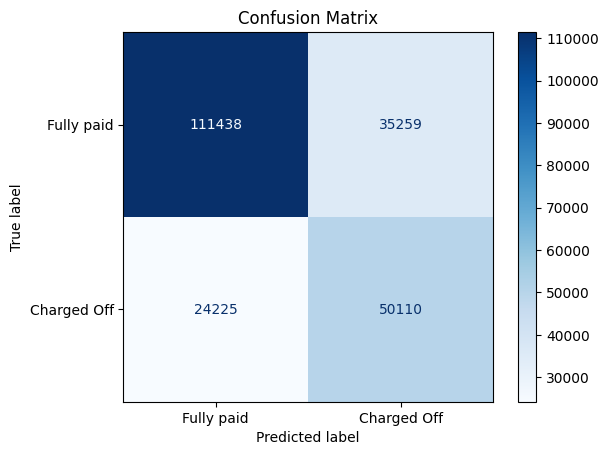

In [ ]:
rf_6 = RandomForestClassifier( max_depth= 15, n_estimators= 200, random_state = 29, class_weight={0: 1, 1: default_weight})
rf_6.fit(x_train, y_train)
pred = rf_6.predict(x_test)
print("Classification Report:") #
print(classification_report(y_test, pred))
cm_6 = confusion_matrix(y_test, pred)
disp_cm6 = ConfusionMatrixDisplay(confusion_matrix=cm_6, display_labels=['Fully paid', 'Charged Off'])
disp_cm6.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79    146697
           1       0.59      0.67      0.63     74335

    accuracy                           0.73    221032
   macro avg       0.70      0.72      0.71    221032
weighted avg       0.74      0.73      0.73    221032



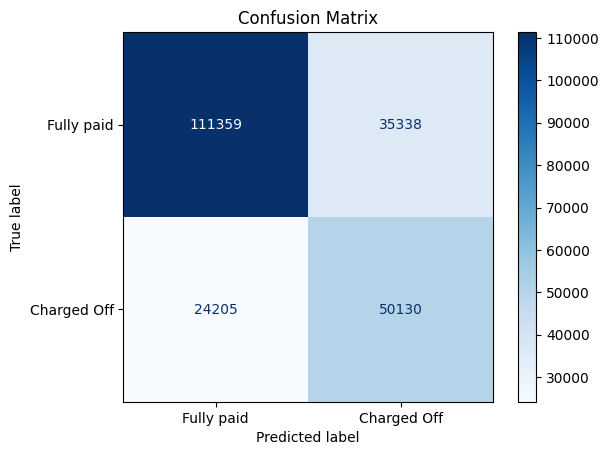

In [ ]:
rf_7 = RandomForestClassifier( max_depth= 15, n_estimators= 100, random_state = 29, class_weight={0: 1, 1: default_weight})
rf_7.fit(x_train, y_train)
pred = rf_7.predict(x_test)
print("Classification Report:") #print classification report
print(classification_report(y_test, pred))
cm_7= confusion_matrix(y_test, pred)
disp_cm7 = ConfusionMatrixDisplay(confusion_matrix=cm_7, display_labels=['Fully paid', 'Charged Off'])
disp_cm7.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79    146697
           1       0.59      0.67      0.63     74335

    accuracy                           0.73    221032
   macro avg       0.70      0.72      0.71    221032
weighted avg       0.74      0.73      0.74    221032



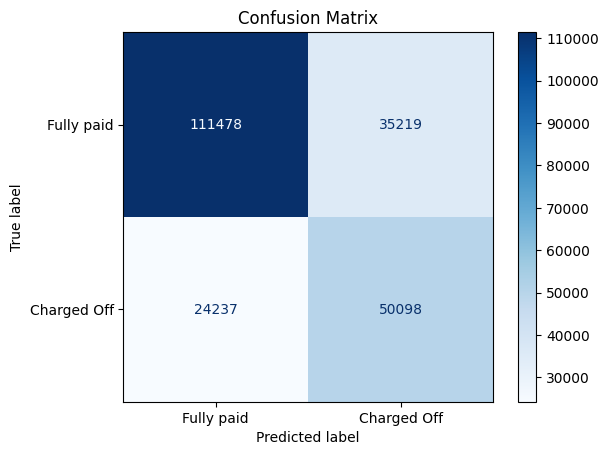

In [ ]:
rf_8 = RandomForestClassifier( max_depth= 15, n_estimators= 300, random_state = 29, class_weight={0: 1, 1: default_weight})

rf_8.fit(x_train, y_train)
pred = rf_8.predict(x_test)
print("Classification Report:") #print classification
print(classification_report(y_test, pred))
cm_8 = confusion_matrix(y_test, pred)
disp_cm8 = ConfusionMatrixDisplay(confusion_matrix=cm_8, display_labels=['Fully paid', 'Charged Off'])
disp_cm8.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#-----------------------------------------------End---------------------------------------------------------------------------------------------------